In [4]:
#Read CSV file
# !pip install --upgrade pip
# !pip install --upgrade
# !pip install sympy

import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy import stats
from scipy.stats import uniform
import sympy as sp
from sympy import symbols, Eq, solve

Problem 1. Generate vector of 10000 random numbers

In [5]:
# a. Plot CDF
# data = np.random.rand(10000) # Uniform dist (0~1) 
n = 10000
data = uniform.rvs(size=n)

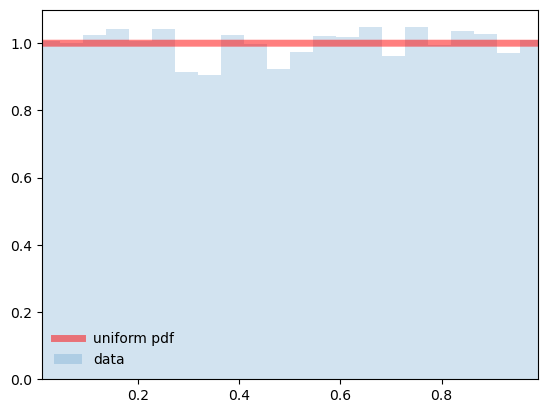

In [6]:
# Visualization of PDF
fig, ax = plt.subplots(1, 1)
x = np.linspace(uniform.ppf(0.01),uniform.ppf(0.99), n)
ax.plot(x, uniform.pdf(x), 'r-', lw=5, alpha=0.5, label='uniform pdf')
ax.hist(data, density = True, bins = 'auto', histtype = 'stepfilled', alpha = 0.2, label='data')
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

In [7]:
# b. Find
# b.1) Mean 
meanD = np.mean(data)

# b.2) Mean of the square 
meanDsquare = np.mean(data**2)
print(meanD, meanDsquare)

# b.3) Variance from python and compare it with E(X^2)-E(X)^2
varD = np.var(data)
varD_cal = meanDsquare-meanD**2
print('Variance is directly from data is', varD, ', and it is same with the E(X^2)-E(X)^2:', varD_cal)

0.5008538965649553 0.33502501593069356
Variance is directly from data is 0.08417039022639473 , and it is same with the E(X^2)-E(X)^2: 0.08417039022639466


Problem 2. Consider pipe leak location problem. 
x^2/(2*L)+x-p*(3*L)/2

In [8]:
# a. Solve CDF formula for x
x, l, p = symbols('x l p')
eqn = Eq((x**2)/(2*l)+x-p*(3*l)/2, 0) # LHS, RHS
eqn

Eq(-3*l*p/2 + x + x**2/(2*l), 0)

In [9]:
xCDF = solve(eqn, x)
x_sol = xCDF[0] # X cannot be negative
x_sol

l*(sqrt(3*p + 1) - 1)

In [10]:
# b. Solve CDF formula for x
xValues = np.zeros(10000)

In [11]:
for i in range(0, 10000, 1):
    xValues[i] = x_sol.evalf(subs={p: data[i], l: 1})
print(xValues)

[0.54676933 0.32478444 0.72486698 ... 0.6807088  0.95837278 0.17910867]


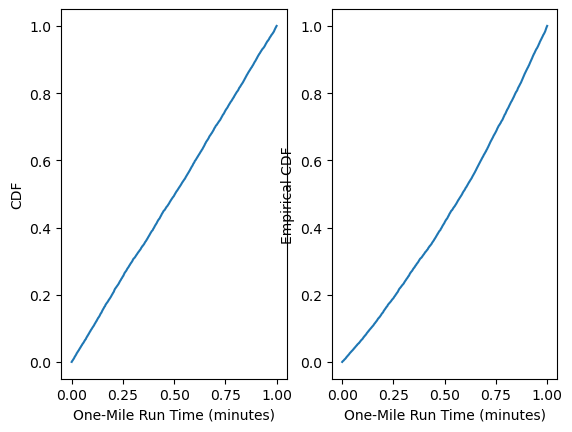

In [15]:
# c. Plot CDF
from statsmodels.distributions.empirical_distribution import ECDF
data_cdf = ECDF(data)
xValues_cdf = ECDF(xValues)

fig, ax = plt.subplots(1, 2)
ax[0].plot(data_cdf.x,data_cdf.y)
ax[1].plot(xValues_cdf.x,xValues_cdf.y)
ax[0].set_xlabel('One-Mile Run Time (minutes)')
ax[0].set_ylabel('CDF')
ax[1].set_xlabel('One-Mile Run Time (minutes)')
ax[1].set_ylabel('Empirical CDF')
plt.show()

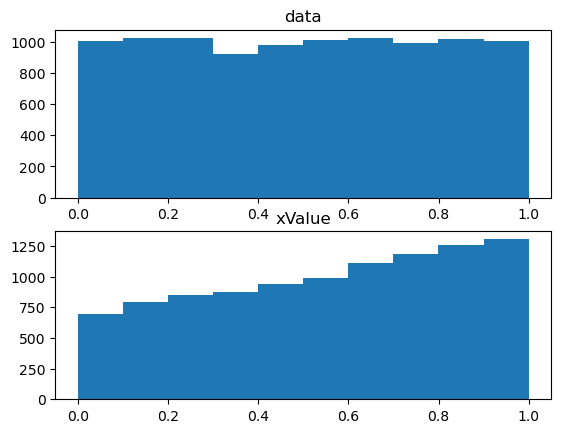

In [16]:
# d. Plot PDF(histogram)
plt.subplot(2, 1, 1) 
plt.hist(data); plt.title('data')
plt.subplot(2, 1, 2) 
plt.hist(xValues); plt.title('xValue')
plt.show()

In [17]:
# e. Find i), ii), iii)
# i) The mean of the numbers generated in b) 
meanD = np.mean(xValues)

# ii) The mean of the square of the numbers generated in b) 
meanDsquare = np.mean(xValues**2)
print(meanD, meanDsquare)

# iii) Variance of the numbers generated in b) using Python variance. Show this is equals the result of (ii) minus the square of the result of (i)
varD = np.var(xValues)
varD_cal = meanDsquare-meanD**2
print('Variance is directly from data is', varD, ', and it is same with the E(X^2)-E(X)^2:', varD_cal)

0.5561086020972389 0.3903444855003877
Variance is directly from data is 0.08108770817384248 , and it is same with the E(X^2)-E(X)^2: 0.08108770817384253


In [18]:
# f. PDF, CDF assumes the pipe location is in inches. Convert it to the cm^2
# Provide your answer

0.012568569629756048 0.01256856962975605


Problem 3. How the expectation and variance changes when we add two random variables. 

In [146]:
# a. Generate two random vectors X and Y, of size 10000 following uniform distribution. 
# Provide your answer

In [ ]:
# b. Generate two random vectors A and B of size 10000 
# A follows Uniform distribution b/w 0 and 1 
# B follows Normal distribution with 0 and 1 (mu = 0, std = 1)

# Provide your answer